# Instacart Market Basket Analysis

This competition was hosted on Kaggle a few years ago. The dataset roughly contains around 3 million rows of around 200,000 customers who shopped on Instacart. The ask in the competition is to predict which previously purchased items of a customer will appear in the customer's next order.

While trying to accomplish the objective of the competition, we are also going to uncover various interesting patterns in the dataset.

The link to the competition is available here.

https://www.kaggle.com/c/instacart-market-basket-analysis

Let's begin!


In [2]:

#Importing the essential libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display
#The following library is imported for using the check_output function 
import subprocess
import zipfile
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))




/kaggle/input/instacart-market-basket-analysis/order_products__train.csv.zip
/kaggle/input/instacart-market-basket-analysis/orders.csv.zip
/kaggle/input/instacart-market-basket-analysis/products.csv.zip
/kaggle/input/instacart-market-basket-analysis/order_products__prior.csv.zip
/kaggle/input/instacart-market-basket-analysis/departments.csv.zip
/kaggle/input/instacart-market-basket-analysis/aisles.csv.zip
/kaggle/input/instacart-market-basket-analysis/sample_submission.csv.zip


Importing the input files

In [6]:
file1 = '../input/instacart-market-basket-analysis/order_products__train.csv.zip'

with zipfile.ZipFile(file1,"r") as z:
# this will print a list of file names in the zip file
    print(z.namelist())

# open the file that you want from that list
    with z.open("order_products__train.csv") as f:
        order_pdts_train = pd.read_csv(f)
        
file2 = '../input/instacart-market-basket-analysis/order_products__prior.csv.zip'

with zipfile.ZipFile(file2,"r") as z:
# this will print a list of file names in the zip file
    print(z.namelist())

# open the file that you want from that list
    with z.open("order_products__prior.csv") as f:
        order_pdts_prior = pd.read_csv(f)
        
file3 = '../input/instacart-market-basket-analysis/sample_submission.csv.zip'

with zipfile.ZipFile(file3,"r") as z:
# this will print a list of file names in the zip file
    print(z.namelist())

# open the file that you want from that list
    with z.open("sample_submission.csv") as f:
        sample_sub = pd.read_csv(f)
        
file4 = '../input/instacart-market-basket-analysis/products.csv.zip'

with zipfile.ZipFile(file4,"r") as z:
# this will print a list of file names in the zip file
    print(z.namelist())

# open the file that you want from that list
    with z.open("products.csv") as f:
        products = pd.read_csv(f)
        
        
file5 = '../input/instacart-market-basket-analysis/aisles.csv.zip'

with zipfile.ZipFile(file5,"r") as z:
# this will print a list of file names in the zip file
    print(z.namelist())

# open the file that you want from that list
    with z.open("aisles.csv") as f:
        aisles = pd.read_csv(f)
        
file6 = '../input/instacart-market-basket-analysis/departments.csv.zip'

with zipfile.ZipFile(file6,"r") as z:
# this will print a list of file names in the zip file
    print(z.namelist())

# open the file that you want from that list
    with z.open("departments.csv") as f:
        departments = pd.read_csv(f)
        
file7 = '../input/instacart-market-basket-analysis/orders.csv.zip'

with zipfile.ZipFile(file7,"r") as z:
# this will print a list of file names in the zip file
    print(z.namelist())

# open the file that you want from that list
    with z.open("orders.csv") as f:
        orders = pd.read_csv(f)
     




['order_products__train.csv', '__MACOSX/', '__MACOSX/._order_products__train.csv']
['order_products__prior.csv', '__MACOSX/', '__MACOSX/._order_products__prior.csv']
['sample_submission.csv']
['products.csv', '__MACOSX/', '__MACOSX/._products.csv']
['aisles.csv', '__MACOSX/', '__MACOSX/._aisles.csv']
['departments.csv', '__MACOSX/', '__MACOSX/._departments.csv']
['orders.csv', '__MACOSX/', '__MACOSX/._orders.csv']


Validating if all the unzipped files have been read properly.

In [7]:
order_pdts_train.head()


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [8]:
order_pdts_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [9]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [10]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [11]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [12]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [13]:
orders['eval_set'].value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

### Q1: How many customers are present in each of these evaluation sets?

In [14]:
orders.groupby('eval_set').agg({'user_id' : lambda x: x.nunique()})

,user_id
eval_set,
prior,206209
test,75000
train,131209


### Q2. What is the distribution of the maximum number of orders of all customers?


In [15]:
orders_per_user = orders.groupby('user_id').agg({'order_number' : ['max']}).rename(columns = {'order_number' : 'orders_per_user'})
orders_per_user.columns = orders_per_user.columns.get_level_values(0)
#Number of times each max value occurs in the above dataframe 
n_orders = orders_per_user.orders_per_user.value_counts()


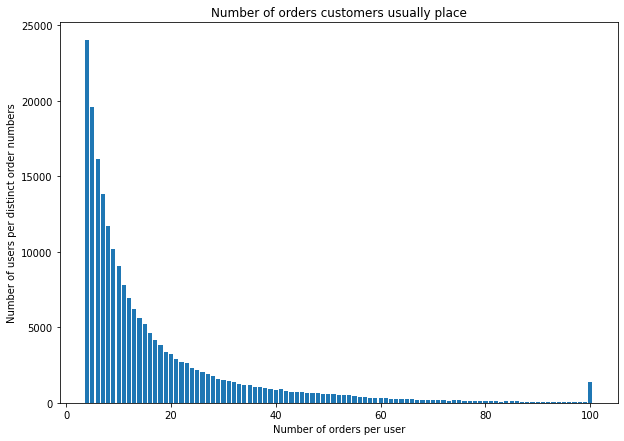

In [16]:
plt.figure(figsize = (10,7))
plt.bar(n_orders.index, n_orders.values)
plt.xlabel('Number of orders per user')
plt.ylabel('Number of users per distinct order numbers')
plt.title('Number of orders customers usually place');

In [17]:
orders_per_user['orders_per_user'].quantile(0.5)  #Median number of order quantity across all customers

10.0

#### Observations about the data:
1) order_pdts_prior and order_pdts_train datasets have the same structure. However, the orders of the customer are split into train, test and prior sets which is evident from the orders dataset.

2) All prior orders of customers are present in order_pdts_prior dataset and the most recent order has been split into training and test sets for our prediction. To identify if a record in test, train or prior, there is an indicator column in the orders dataset

3) The number of unique customers in the prior, train and test sets have been identified

4) Majority of the customers place a maximum of 10 orders (median number of orders)





### Q3. Which day of the week has the maximum number of reorders?

Since order_pdts_prior and order_pdts_train have the same structure, we are concatenating them into one for further analysis.

In [18]:
ordered_pdts_all = pd.concat([order_pdts_prior,order_pdts_train], axis = 0)
ordered_pdts_all.shape

(33819106, 4)

In [19]:
# Merge ordered_pdts with orders to get a pic of reorder and day of week relationship
merged_order_dow = pd.merge(ordered_pdts_all, orders, on = "order_id", how = 'left')
merged_order_dow.shape
merged_order_dow.head()


,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0


In [20]:
norders_dow = merged_order_dow[['order_dow','order_id']].groupby('order_dow')['order_id'].count().\
                reset_index(name='num_orders').sort_values(['num_orders'],ascending = False)

norders_dow

n_reorders_dow = merged_order_dow[merged_order_dow['eval_set'].isin(['prior', 'train']) & \
                                  merged_order_dow['reordered'] == 1].\
                groupby('order_dow')['reordered'].\
                sum().reset_index(name = 'num_orders').sort_values(['num_orders'],ascending = False)

n_reorders_dow


,order_dow,num_orders
0,0,3831900
1,1,3544661
6,6,2708008
5,5,2613888
2,2,2582006
3,3,2344277
4,4,2330620


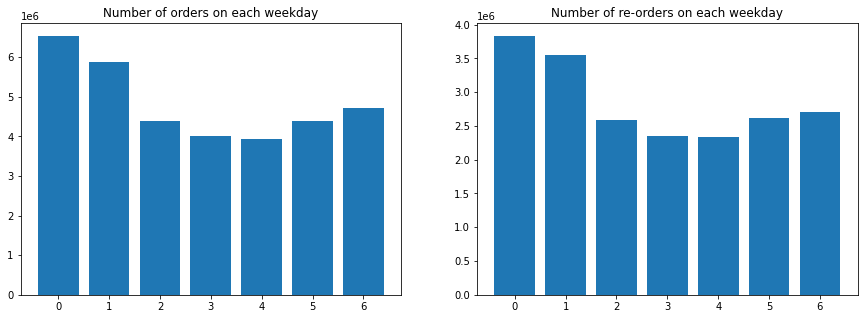

In [21]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

ax[0].bar('order_dow' , 'num_orders' ,data = norders_dow)
ax[1].bar('order_dow' , 'num_orders' ,data = n_reorders_dow)
ax[0].set_title('Number of orders on each weekday')
ax[1].set_title('Number of re-orders on each weekday');




### Observation

Assuming Day0 as Saturday, we see that the number of orders as well as number of re-orders are very high on Saturday and Sunday while it is the lowest on Wednesday. This might be an important factor for modelling the probability of an item re-order.



### Q4. What hour of the day has the highest orders and reorders?


In [25]:
norders_hod = merged_order_dow[['order_hour_of_day','order_id']].groupby('order_hour_of_day')['order_id'].count().\
                reset_index(name='num_orders').sort_values(['num_orders'],ascending = False)



n_reorders_hod = merged_order_dow[merged_order_dow['eval_set'].isin(['prior', 'train']) & \
                                  merged_order_dow['reordered'] == 1].\
                groupby('order_hour_of_day')['reordered'].\
                sum().reset_index(name = 'num_reorders').sort_values(['num_reorders'],ascending = False)


,order_hour_of_day,num_reorders
10,10,1726499
11,11,1676271
14,14,1635288
15,15,1615183
13,13,1612121
12,12,1583898
9,9,1580305
16,16,1533153
17,17,1258378
8,8,1130174


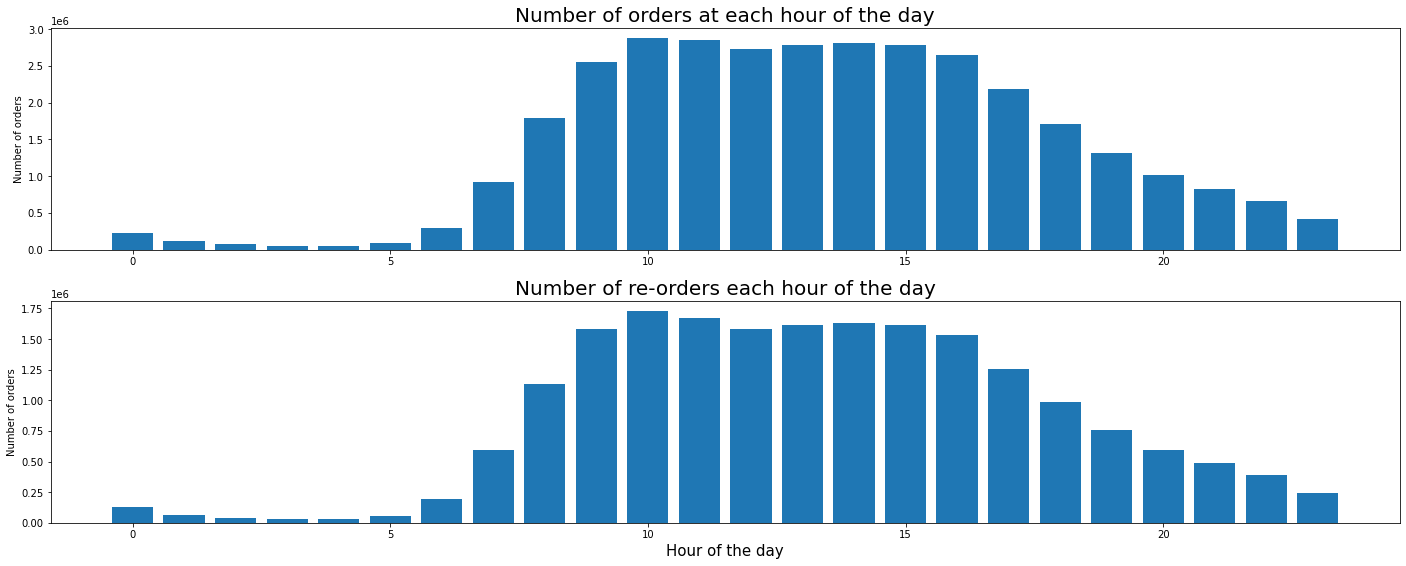

In [36]:


fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (20, 8))
fig.tight_layout(pad=3.0)
ax[0].bar('order_hour_of_day' , 'num_orders' ,data = norders_hod)
ax[1].bar('order_hour_of_day' , 'num_reorders' ,data = n_reorders_hod)
ax[0].set_ylabel('Number of orders',fontsize=15)
ax[1].set_ylabel('Number of orders', fontsize=15)
ax[1].set_xlabel('Hour of the day', fontsize=15)
ax[0].set_title('Number of orders at each hour of the day', fontsize = 20)
ax[1].set_title('Number of re-orders each hour of the day', fontsize = 20);


### Observation
Between 10AM and 3PM the orders are high. During early hours from midnight till 5AM, the number of orders placed are less.